In [42]:
# Polynomial Regression:
# Technically not linear regrression
# In this case the salary is increasing exponentially wrt the level. Position is equivalent to level number
# So position is not considered as another significant variable as it is redundant

In [43]:
# Data Preprocessing:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')

# Separating into dependent and independent variables
# We technically don't need the 'Position' column cz it's kinda encoded in terms of the level actually like Business Analyst = 1
# We want matrix of features 'x' to be seen as a matrix and not a vector. So we do it like this.
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# We don't split the dataset because the data is too less. But we will predict by giving in some random values

In [44]:
x        # Now it's a matrix and not a vector
# It is always better to keep 'x' as a matrix evem if it has only 1 column and 'y' as a vector

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [45]:
# We will build both linear and polynomial regression models to compare them

# Linear Regression model:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
# Polynomial Regression model:
# This class is imported from preprocessing library and not the linear_model library
# PolynomialFeatures takes in the degree 
# Thus it creates x^1, x^2 ... x^n different variables based on the degree entered
# degree = 2, by default

from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 2)
x_poly = polynomial_regressor.fit_transform(x)        # We use fit_transform cz it will create new values and transform
                                                         # the empty variable to non-empty

In [47]:
x_poly
# There is a column of 1's for the constant 'b0' of the equation because we can do backward elimination if needed
# Thus we can understand that polynomial regression is somewhat like Multiple linear regression, only with some extra libraries

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [48]:
x_poly.dtype

dtype('float64')

In [49]:
# Now we create a new multiple linear regression model with the 'x_poly' values this time
# Thus 'linear_regression_2' is our actual polynomial regression model
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

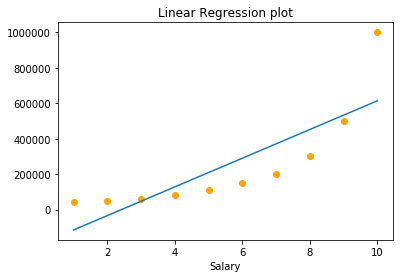

In [50]:
# Visualising the Linear Regression results

y_pred = linear_regressor.predict(x)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Linear Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# As we can see that linear regression straight line is nowhere a good predictor

In [51]:
y_pred
# These are not great predictions
# Some even come in -ve. LOL XD

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

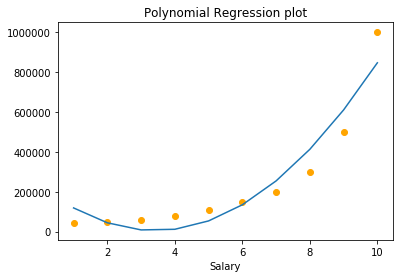

In [52]:
# Visualising the Polynomial Regression results

y_pred = linear_regressor_2.predict(x_poly)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Now we can see this graph is a smooth predictor

In [53]:
y_pred
# Now these are some accurate predictions

array([118727.27272727,  44151.51515152,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

In [54]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

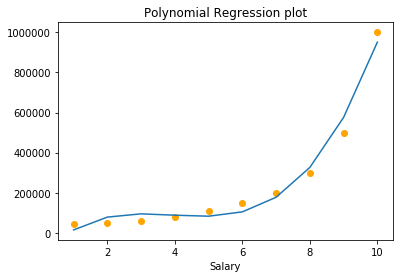

In [55]:
# To predict even better we can even play around with degrees. Here we changed it to 3
polynomial_regressor = PolynomialFeatures(degree = 3)
x_poly = polynomial_regressor.fit_transform(x)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(x_poly, y)

# And plot it
y_pred = linear_regressor_2.predict(x_poly)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Seems kinda better

In [56]:
y_pred
# Maybe even better predictions

array([ 14902.09790208,  78759.9067599 ,  94960.37296038,  88223.77622379,
        83270.39627041, 104820.51282052, 177594.40559441, 326312.35431235,
       575694.63869463, 950461.53846153])

In [57]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

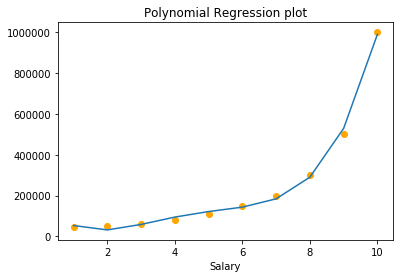

In [58]:
# For fun lets see what will degrees = 4 reveals

polynomial_regressor = PolynomialFeatures(degree = 4)
x_poly = polynomial_regressor.fit_transform(x)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(x_poly, y)

# And plot it
y_pred = linear_regressor_2.predict(x_poly)
plt.scatter(x, y, color = 'orange')
plt.plot(x, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Actually even better

In [59]:
y_pred
# Even better predictions

array([ 53356.64335683,  31759.90675992,  58642.19114218,  94632.86713289,
       121724.941725  , 143275.05827513, 184003.49650353, 289994.17249412,
       528694.6386945 , 988916.0839159 ])

In [60]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

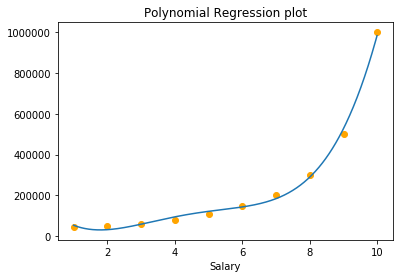

In [68]:
# But we see that out model makes good predictions but it's plotting straight lines in between predictions and not smooth curves
# We will tackle that here
# Out model contains level 1-10 incrementing each by 1
# To get a smoother curve we can increment it by 0.1 or 0.01 which will predict y_pred for each of 'x_grid'

x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
# We made an array with values between min(x) and max(x) with incrementation of 0.1 at each step
# We had to reshape it just to make sure it is an array with 'len(x)' rows and only 1 column just as it was in 'x'

# And now we plot
# For this we had to transform x_poly
x_poly = polynomial_regressor.fit_transform(x_grid)
y_pred = linear_regressor_2.predict(x_poly)
plt.scatter(x, y, color = 'orange')
plt.plot(x_grid, y_pred)
plt.title('Polynomial Regression plot')
plt.xlabel('Position level')
plt.xlabel('Salary')
plt.show()

# Actually even smoother

In [84]:
# Predicting new result with a new input
# Using Linear Regression Model:
# We can actually use this method using 1 constant, but we have to send the data in the form of a 2-D array only

linear_regressor.predict([[6.5]])

array([330378.78787879])

In [93]:
# Using polynomial regression model:

linear_regressor_2.predict(polynomial_regressor.fit_transform([[6.5]]))
# We put polynomial_regressor object inside because it makes the polynomial object that way with the 1's and 6.5 and then 
# shows us the results
# Now this is a much accurate result

array([158862.45265157])